make a function that does multi classification

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
y = mnist['target']
x = mnist['data']
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [4]:
x = np.array(x)

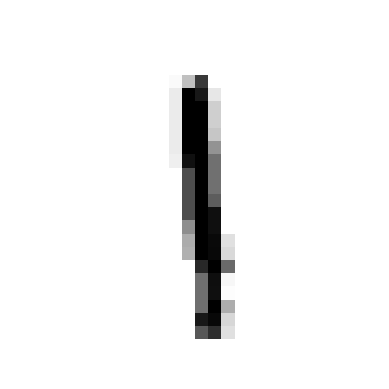

In [5]:

some_digit = x[8]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8

In [9]:
y_train_0 = (y_train == 0)
y_train_1 = (y_train == 1)
y_train_2 = (y_train == 2)
y_train_3 = (y_train == 3)
y_train_4 = (y_train == 4)
y_train_5 = (y_train == 5)
y_train_6 = (y_train == 6)
y_train_7 = (y_train == 7)
y_train_8 = (y_train == 8)
y_train_9 = (y_train == 9)

y_test_0 = (y_test == 0)
y_test_1 = (y_test == 1)
y_test_2 = (y_test == 2)
y_test_3 = (y_test == 3)
y_test_4 = (y_test == 4)
y_test_5 = (y_test == 5)
y_test_6 = (y_test == 6)
y_test_7 = (y_test == 7)
y_test_8 = (y_test == 8)
y_test_9 = (y_test == 9)

In [10]:
y_train_0

0        False
1         True
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [11]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_cf_0 = SGDClassifier(random_state = 42)
sgd_cf_1 = SGDClassifier(random_state = 42)
sgd_cf_2 = SGDClassifier(random_state = 42)
sgd_cf_3 = SGDClassifier(random_state = 42)
sgd_cf_4 = SGDClassifier(random_state = 42)
sgd_cf_5 = SGDClassifier(random_state = 42)
sgd_cf_6 = SGDClassifier(random_state = 42)
sgd_cf_7 = SGDClassifier(random_state = 42)
sgd_cf_8 = SGDClassifier(random_state = 42)
sgd_cf_9 = SGDClassifier(random_state = 42)
cls_0 = sgd_cf_0.fit(X_train,y_train_0)
cls_1 = sgd_cf_1.fit(X_train,y_train_1)
cls_2 = sgd_cf_2.fit(X_train,y_train_2)
cls_3 = sgd_cf_3.fit(X_train,y_train_3)
cls_4 = sgd_cf_4.fit(X_train,y_train_4)
cls_5 = sgd_cf_5.fit(X_train,y_train_5)
cls_6 = sgd_cf_6.fit(X_train,y_train_6)
cls_7 = sgd_cf_7.fit(X_train,y_train_7)
cls_8 = sgd_cf_8.fit(X_train,y_train_8)
cls_9 = sgd_cf_9.fit(X_train,y_train_9)



In [29]:
cls_0

SGDClassifier(random_state=42)

In [30]:
cls_0.predict([x[1]])

array([ True])

In [31]:
y_scores_0 = cls_0.decision_function([x[1]])
y_scores_0[0]

np.float64(21180.550827336618)

In [37]:

def plot_num(database,ind):   
    some_digit = database[ind]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
def arr_score(index, classifiers, x):
    ans = []
    for i in range(10):
        y_score = classifiers[i].decision_function([x[index]])
        ans.append(y_score[0])
    return ans

def recognise_img(ind, database):
    classifiers = [cls_0, cls_1, cls_2, cls_3, cls_4, cls_5, cls_6, cls_7, cls_8, cls_9]
    scores = arr_score(ind, classifiers, database)
    
    maxi = -float('inf')  
    index = -1  
    
    for i, score in enumerate(scores): 
        if score > maxi:  
            maxi = score
            index = i
    plot_num(database,ind)
    print("this number is probelly",index)


    

enter a random number between 0 - 60000 345


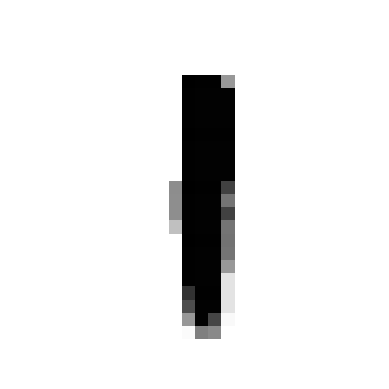

this number is probelly 1


In [44]:
inp = int(input("enter a random number between 0 - 60000"))
recognise_img(inp,X_test)